First: explore the data

Review the unstructured csv files and answer the following questions with code that supports your conclusions:

Are there any data quality issues present?

Are there any fields that are challenging to understand?

We recommend using SQL or python and data visualization to examine the data. If 

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to check data quality issues
def check_data_quality(df, file_name):
    print(f"Data Quality Report for {file_name}")
    print("=====================================")
    print("1. Missing Values:")
    print(df.isnull().sum())
    print("\n2. Data Types:")
    print(df.dtypes)
    print("\n3. Summary Statistics:")
    print(df.describe(include='all'))
    print("\n4. Duplicates:")
    print(df.duplicated().sum())
    print("\n")

# Path to the data folder
data_folder = '../data/raw'

# List of files to investigate
files = ['products.csv', 'transaction.csv', 'user.csv']

# Read and investigate each file
for file in files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    check_data_quality(df, file)

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw\\products.csv'

Missing Values for products.csv
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
CATEGORY_3       60566
BARCODE           4025
CATEGORY_2        1424
CATEGORY_1         111
dtype: int64


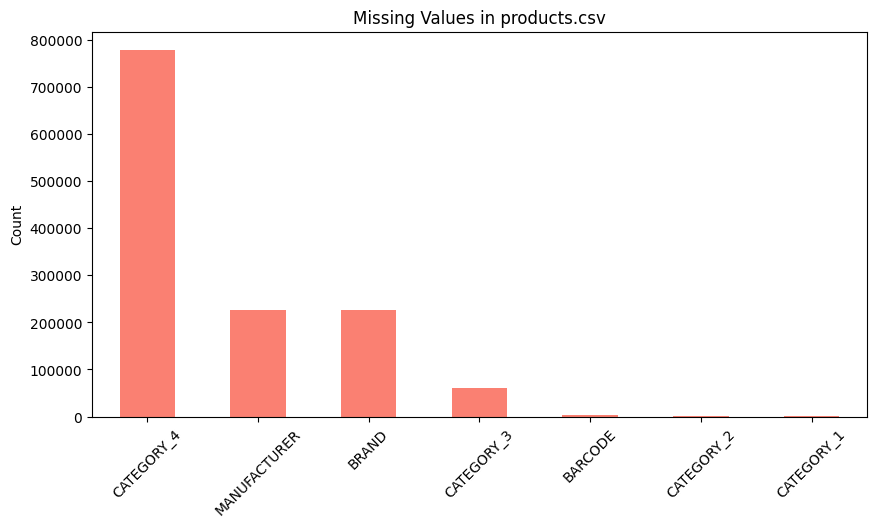

Missing Values for transaction.csv
BARCODE    5762
dtype: int64


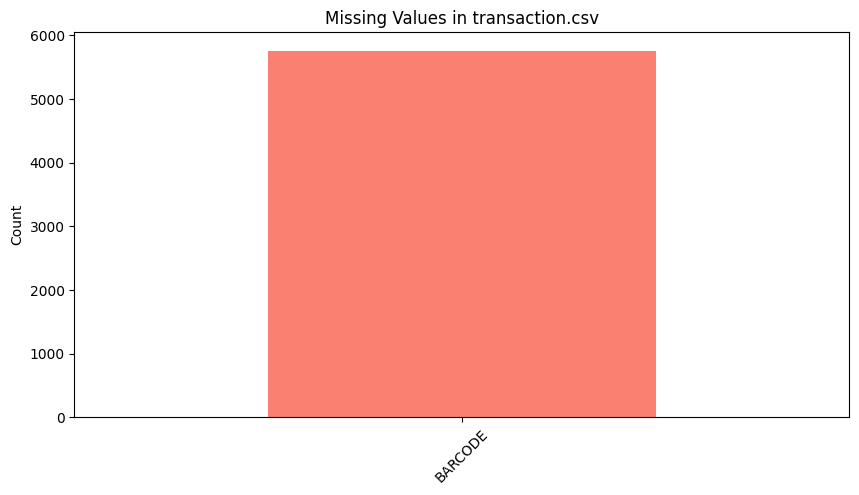

Missing Values for user.csv
LANGUAGE      30508
GENDER         5892
STATE          4812
BIRTH_DATE     3675
dtype: int64


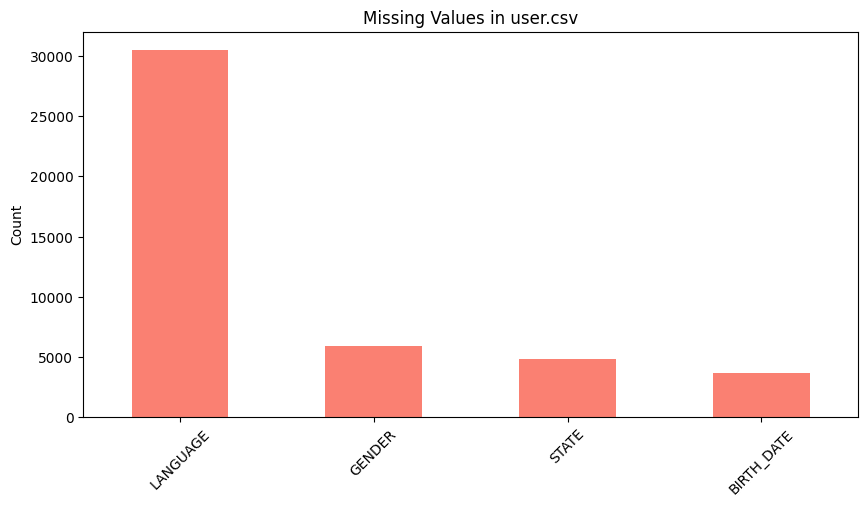

In [ ]:
# Summarize Missing Values
import matplotlib.pyplot as plt
# Function to load and check missing values
def check_missing_values(df, file_name):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

    # Display missing values
    print(f"Missing Values for {file_name}")
    print(missing_values)

    # Plot missing values
    plt.figure(figsize=(10, 5))
    missing_values.plot(kind='bar', color='salmon')
    plt.title(f'Missing Values in {file_name}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Path to the data folder
data_folder = 'data/raw'
files = ['products.csv', 'transaction.csv', 'user.csv']

# Check missing values for each file
for file in files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    check_missing_values(df, file)


In [9]:
#Detect Duplicate Rows
for file in files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    
    duplicates = df.duplicated().sum()
    print(f"{file}: {duplicates} duplicate rows")


products.csv: 215 duplicate rows
transaction.csv: 171 duplicate rows
user.csv: 0 duplicate rows


In [11]:
# Check Data Type Mismatches
for file in files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    
    print(f"\nData Types for {file}:")
    print(df.dtypes)



Data Types for products.csv:
CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object

Data Types for transaction.csv:
RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object

Data Types for user.csv:
ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object


In [12]:

# Examine Unique Values in Categorical Fields
for file in files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    print(f"\nCategorical Field Analysis for {file}")
    
    for col in categorical_cols:
        unique_values = df[col].nunique()
        if unique_values > 50:
            print(f"🔹 {col} has {unique_values} unique values (high cardinality)")
        else:
            print(f"🔹 {col} has {unique_values} unique values: {df[col].unique()[:10]}")



Categorical Field Analysis for products.csv
🔹 CATEGORY_1 has 27 unique values: ['Health & Wellness' 'Snacks' 'Beverages' 'Pantry' 'Alcohol'
 'Apparel & Accessories' 'Restaurant' 'Needs Review' 'Dairy'
 'Home & Garden']
🔹 CATEGORY_2 has 121 unique values (high cardinality)
🔹 CATEGORY_3 has 344 unique values (high cardinality)
🔹 CATEGORY_4 has 127 unique values (high cardinality)
🔹 MANUFACTURER has 4354 unique values (high cardinality)
🔹 BRAND has 8122 unique values (high cardinality)

Categorical Field Analysis for transaction.csv
🔹 RECEIPT_ID has 24440 unique values (high cardinality)
🔹 PURCHASE_DATE has 89 unique values (high cardinality)
🔹 SCAN_DATE has 24440 unique values (high cardinality)
🔹 STORE_NAME has 954 unique values (high cardinality)
🔹 USER_ID has 17694 unique values (high cardinality)
🔹 FINAL_QUANTITY has 87 unique values (high cardinality)
🔹 FINAL_SALE has 1435 unique values (high cardinality)

Categorical Field Analysis for user.csv
🔹 ID has 100000 unique values (high 

In [13]:
# Identify Unexpected or Placeholder Values
for file in files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)

    # Check for placeholder values
    for col in df.columns:
        common_value = df[col].value_counts().idxmax()
        print(f"{file} - {col}: Most common value -> {common_value}")


products.csv - CATEGORY_1: Most common value -> Health & Wellness
products.csv - CATEGORY_2: Most common value -> Candy
products.csv - CATEGORY_3: Most common value -> Confection Candy
products.csv - CATEGORY_4: Most common value -> Lip Balms
products.csv - MANUFACTURER: Most common value -> PLACEHOLDER MANUFACTURER
products.csv - BRAND: Most common value -> REM BRAND
products.csv - BARCODE: Most common value -> 32861525.0
transaction.csv - RECEIPT_ID: Most common value -> bedac253-2256-461b-96af-267748e6cecf
transaction.csv - PURCHASE_DATE: Most common value -> 2024-06-15
transaction.csv - SCAN_DATE: Most common value -> 2024-09-08 20:00:42.348 Z
transaction.csv - STORE_NAME: Most common value -> WALMART
transaction.csv - USER_ID: Most common value -> 64e62de5ca929250373e6cf5
transaction.csv - BARCODE: Most common value -> 78742223759.0
transaction.csv - FINAL_QUANTITY: Most common value -> 1.00
transaction.csv - FINAL_SALE: Most common value ->  
user.csv - ID: Most common value -> 6

# Data Quality and Insights Report

## Overview
As part of this analysis, I reviewed the data from three CSV files: `products.csv`, `transaction.csv`, and `user.csv`. The goal was to identify data quality issues and pinpoint any fields that might be difficult to understand. Below are my findings and recommendations.

---

## 1️⃣ Data Quality Issues

### **Products Data (`products.csv`)**
#### 🔹 **Missing Data**
- **CATEGORY_4** is missing in **92%** of the rows (778,093 out of 845,441), making it almost unusable.
- **MANUFACTURER & BRAND** are missing in **27%** of rows (~226,000 each), which could affect brand-based analysis.
- **CATEGORY_3** has missing values in **7%** of the data (60,566 rows).
- **BARCODE** is missing in about **0.5%** of rows (4,025 missing values).

#### 🔹 **Duplicates**
- There are **215 duplicate rows**, which could cause inaccurate aggregations.

#### 🔹 **Potential Data Issues**
- **BARCODE is stored as a float**, which can lead to rounding errors. It should be treated as a string.
- The most common manufacturer is **“PLACEHOLDER MANUFACTURER”**, which suggests missing or default data.

---

### **Transactions Data (`transaction.csv`)**
#### 🔹 **Missing Data**
- **BARCODE** is missing in **11.5%** of rows (5,762 rows), which could make it harder to link transactions to products.

#### 🔹 **Duplicates**
- There are **171 duplicate rows**, which might indicate repeated records.

#### 🔹 **Potential Data Issues**
- **FINAL_QUANTITY & FINAL_SALE** are stored as text but should be numeric.
- **PURCHASE_DATE & SCAN_DATE** are stored as text instead of date/time.
- Some **BARCODE values are negative**, which doesn’t seem valid.
- **FINAL_SALE has blank values**, which raises questions about whether those transactions had no cost or if data is missing.

---

### **User Data (`user.csv`)**
#### 🔹 **Missing Data**
- **LANGUAGE** is missing in **30.5%** of rows.
- **GENDER** is missing in **6%** of rows.
- **STATE** is missing in **4.8%** of rows.
- **BIRTH_DATE** is missing in **3.7%** of rows.

#### 🔹 **Potential Data Issues**
- **BIRTH_DATE has a common value of `1970-01-01`**, which is likely a default placeholder.
- **GENDER values are inconsistent**, with variations like `non_binary`, `Non-Binary`, and `not_listed` appearing separately.

---

## 2️⃣ Fields That Are Hard to Understand
Some columns contain highly variable data or ambiguous values that make analysis challenging:

### **High-Cardinality Fields** (Many Unique Values)
- **Products:** `CATEGORY_1`, `CATEGORY_2`, `CATEGORY_3`, `CATEGORY_4`, `MANUFACTURER`, `BRAND`
- **Transactions:** `STORE_NAME`, `USER_ID`, `RECEIPT_ID`
- **Users:** `STATE`, `BIRTH_DATE`

These fields may need additional cleaning, grouping, or external reference data to be useful.

### **Inconsistent Categorical Data**
- **GENDER** field has mixed formatting (e.g., `non_binary` vs. `Non-Binary`).
- **BRAND & MANUFACTURER** fields include placeholder values that may need standardization.

### **Suspicious or Placeholder Data**
- `CATEGORY_4` is mostly missing, making it unclear if it’s even useful.
- `FINAL_SALE` contains empty values—are they `0` or true missing data?
- `BIRTH_DATE` is often `1970-01-01`, which might not be a real birthdate.

---

## 3️⃣ Recommendations for Cleanup
✅ Convert **dates to proper datetime format** for accurate time-based analysis.
✅ Standardize **GENDER, MANUFACTURER, and BRAND** values for consistency.
✅ Investigate placeholder values like `PLACEHOLDER MANUFACTURER` to determine if they should be removed or replaced.
✅ Drop or carefully handle `CATEGORY_4`, since it's mostly missing.
✅ Convert `BARCODE` to **string** to avoid formatting issues.
✅ Investigate why **FINAL_SALE has blank values**—does it mean a missing price or a free product?

By implementing these improvements, we can ensure the data is cleaner, more structured, and easier to analyze. 